Chinese: ma(1),ma(2),ma(3),ma(4), mi(1),mi(2),mi(3),mi(4),

Merged.

Get the starting timestamp of target and recon, then choose 7.4s after the starting timestamp.

In [1]:
from dSPEECH.config import *
import matplotlib.pyplot as plt
import librosa
folder=data_dir+'evaluation_matrix/dataset7/'
filename=folder+'adh0478_Audio_S1.mp3'
audio,sf=librosa.load(filename) # (617400,) sf=22050

pre_all: Running from CMD.
common_dl.py: Using CUDA.


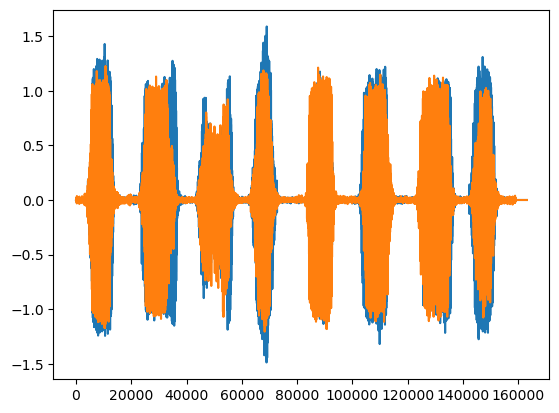

In [4]:
%matplotlib inline
target=audio[46153:46153+int(7.4*sf)]
pred=audio[294395:294395+int(7.4*sf)]
plt.plot(target)
plt.plot(pred)
#plt.plot(audio[int(13.315*sf):int(13.382*sf)])

In [12]:
trial_num=8
trial_len=int(len(target)/trial_num)
starts=[i*trial_len for i in range(trial_num)]
starts[-1]=starts[-1]-int(0.1*sf)
starts[-3]=starts[-3]-int(0.1*sf)

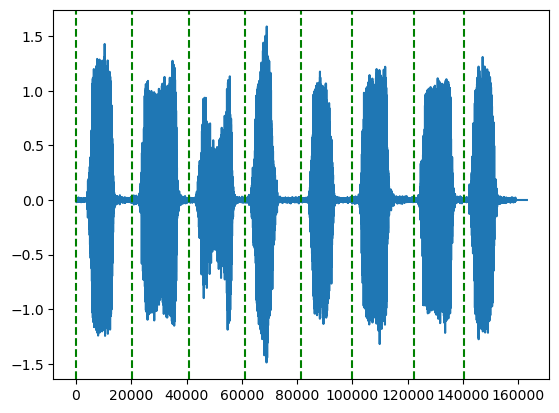

In [13]:
fig,ax=plt.subplots()
ax.plot(target)
for i in range(trial_num):
    ax.axvline(x=int(starts[i]), color='green', linestyle='--')

In [14]:
import soundfile
for trial in range(trial_num):
    if trial==trial_num-1: # same as the else clause
        tmp1=target[starts[trial]:]
        soundfile.write(folder+'target_trial_'+str(trial)+'.wav', tmp1, sf)
        
        tmp2=pred[starts[trial]:]
        soundfile.write(folder+'pred_trial_'+str(trial)+'.wav', tmp2, sf)
        
    else:
        tmp1=target[starts[trial]:starts[trial]+trial_len]
        soundfile.write(folder+'target_trial_'+str(trial)+'.wav', tmp1, sf)
        
        tmp2=pred[starts[trial]:starts[trial]+trial_len]
        soundfile.write(folder+'pred_trial_'+str(trial)+'.wav', tmp2, sf)

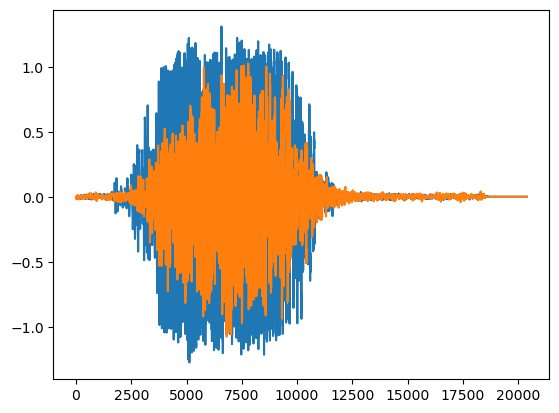

In [26]:
# final check: not perfect, but it's alright
trial=7
tmp1=target[starts[trial]:starts[trial]+trial_len]
tmp2=pred[starts[trial]:starts[trial]+trial_len]

plt.plot(tmp1)
plt.plot(tmp2)